In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# [10 points] Load the data set and compute 


# Cell to import the functions
from adult import read_csv_1, num_rows, column_names, missing_values, columns_with_missing_values, bachelors_masters_percentage, data_frame_without_missing_values, one_hot_encoding, label_encoding, dt_predict, dt_error_rate
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
# Use the functions in your notebook. For example, to read the data:
data_file = 'data/adult.csv' # Replace with the correct path to your adult.csv file
df = read_csv_1(data_file)

# You can then use the dataframe 'df' with other functions
number_of_rows = num_rows(df)
print(f'Number of rows: {number_of_rows}')

# Call the functions and print the results for verification
print('Number of instances:', num_rows(df))
print('List with the attribute names:', column_names(df))
print('Number of missing values:', missing_values(df))
print('Columns with missing values:', columns_with_missing_values(df))
print(f'Percentage of instances corresponding to Bachelors or Masters: {bachelors_masters_percentage(df):.2f}%') 

# Apply the functions to the original dataframe
df_clean = data_frame_without_missing_values(df)
df_features_encoded = one_hot_encoding(df_clean)
df_target_encoded = label_encoding(df_clean)

# Let's check the first few rows of the processed dataframes

df_clean.head(), df_features_encoded.head(), df_target_encoded.head()

# We don't drop 'class' from df_features_encoded since it only contains features after one_hot_encoding
X = df_features_encoded  
# y is already a series with the encoded class labels after label_encoding
y = df_target_encoded  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)



Number of rows: 48842
Number of instances: 48842
List with the attribute names: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native-country', 'class']
Number of missing values: 6465
Columns with missing values: ['workclass', 'occupation', 'native-country']
Percentage of instances corresponding to Bachelors or Masters: 21.87%


c:\Users\eagua\anaconda3\envs\Data_Mining\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
y_pred = dt_predict(X_train, X_test, y_train)



In [ ]:
dt_error_rate(y_pred, y_test)

In [ ]:
# Cell to import the functions
from adult import read_csv_1, num_rows, column_names, missing_values, columns_with_missing_values, bachelors_masters_percentage, data_frame_without_missing_values, one_hot_encoding, label_encoding, dt_predict, dt_error_rate
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
# Use the functions in your notebook. For example, to read the data:
data_file = 'data/adult.csv' # Replace with the correct path to your adult.csv file
df = read_csv_1(data_file)
# Define the function to read the CSV file
def read_csv_data(file_path):
    # Read the CSV file using pandas
    df = pd.read_csv(file_path ,delimiter=',')
    return df

# Load the dataset
file_path = pd.read_csv('data/adult.csv', delimiter=',')
df = file_path
df = df.drop(columns=['fnlwgt'], errors='ignore')
# Display the first few rows of the dataframe
df.head()

- (a) the number of instances, 
- (b) a list with the attribute names, 
- (c) the number of missing attribute values, 
- (d) a list of the attribute names with at least one missing value, and 
- (e) the percentage of instances corresponding to individuals whose education level is Bachelors or Masters.

In [7]:
# Define the functions as per the tasks

# Function to return the number of rows in the DataFrame (a)
def num_rows(df): 
    return df.shape[0]

# Function to return a list with the column names in the DataFrame (b)
def column_names(df):
    return df.columns.tolist()

# Function to return the number of missing values in the DataFrame (c)
# Assuming that 'fnlwgt' is the 'flngut' mentioned to be dropped and missing values are represented by '?' 
def missing_values(df): 
    # Drop the 'fnlwgt' column as instructed
    #df = df.drop(columns=['fnlwgt'], errors='ignore')
    # Replace ' ?' with NaN for detecting missing values
    df.replace(' ?', pd.NA, inplace=True)
    return df.isna().sum().sum()

# Function to return a list with the columns containing at least one missing value (d)
def columns_with_missing_values(df):
    # Replace ' ?' with NaN for detecting missing values
    df.replace(' ?', pd.NA, inplace=True)
    return df.columns[df.isna().any()].tolist()

# Function to return the percentage of instances corresponding to Bachelors or Masters
def bachelors_masters_percentage(df):
    # Calculate the percentage
    percentage = df[df['education'].isin(['Bachelors', 'Masters'])].shape[0] / df.shape[0] * 100
    return percentage

# Call the functions and print the results for verification
print('Number of instances:', num_rows(df))
print('List with the attribute names:', column_names(df))
print('Number of missing values:', missing_values(df))
print('Columns with missing values:', columns_with_missing_values(df))
print(f'Percentage of instances corresponding to Bachelors or Masters: {bachelors_masters_percentage(df):.2f}%') 



Number of instances: 48842
List with the attribute names: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native-country', 'class']
Number of missing values: 6465
Columns with missing values: ['workclass', 'occupation', 'native-country']
Percentage of instances corresponding to Bachelors or Masters: 21.87%


In [8]:
#Let's redefine the functions according to the specified format.
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Function to return a dataframe without missing values
def data_frame_without_missing_values(df):
    # Assuming that '?' represents a missing value in the dataframe
    df_cleaned = df.replace(' ?', pd.NA).dropna()
    return df_cleaned

# Function to perform one-hot encoding on the dataframe's categorical attributes
def one_hot_encoding(df):
    # First, we remove the target attribute to ensure it's not encoded
    df_features = df.drop(columns=['class'])  # Dropping 'fnlwgt' as it's not required

    # Perform one-hot encoding
    onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    features_encoded = onehot_encoder.fit_transform(df_features)
    
    # Convert the array back to a dataframe with appropriate column names
    columns_encoded = onehot_encoder.get_feature_names_out(df_features.columns)
    df_encoded = pd.DataFrame(features_encoded, columns=columns_encoded, index=df_features.index)
    
    return df_encoded

# Function to perform label encoding on the dataframe's class labels
def label_encoding(df):
    # Isolate the target attribute
    target = df[['class']].copy()  # Use double brackets to keep it as a dataframe

    # Perform label encoding
    label_encoder = LabelEncoder()
    target_encoded = label_encoder.fit_transform(target['class'])
    
    # Convert the array back to a pandas series
    series_encoded = pd.Series(target_encoded, name='class', index=target.index)

    return series_encoded

# Apply the functions to the original dataframe
df_clean = data_frame_without_missing_values(df)
df_features_encoded = one_hot_encoding(df_clean)
df_target_encoded = label_encoding(df_clean)

# Let's check the first few rows of the processed dataframes

df_clean.head(), df_features_encoded.head(), df_target_encoded.head()



c:\Users\eagua\anaconda3\envs\Data_Mining\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(   age         workclass  education  education-num      marital-status  \
 0    2         State-gov  Bachelors             13       Never-married   
 1    3  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
 2    2           Private    HS-grad              9            Divorced   
 3    3           Private       11th              7  Married-civ-spouse   
 4    1           Private  Bachelors             13  Married-civ-spouse   
 
           occupation   relationship   race     sex  capitalgain  capitalloss  \
 0       Adm-clerical  Not-in-family  White    Male            1            0   
 1    Exec-managerial        Husband  White    Male            0            0   
 2  Handlers-cleaners  Not-in-family  White    Male            0            0   
 3  Handlers-cleaners        Husband  Black    Male            0            0   
 4     Prof-specialty           Wife  Black  Female            0            0   
 
    hoursperweek native-country  class  
 0             2  U

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import  precision_recall_fscore_support, accuracy_score, confusion_matrix

# We don't drop 'class' from df_features_encoded since it only contains features after one_hot_encoding
X = df_features_encoded  
# y is already a series with the encoded class labels after label_encoding
y = df_target_encoded  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(f'Accuracy:{accuracy_score(y_test, y_pred)* 100:.2f}%')

training_error_rate = 1 - accuracy_score(y_test, y_pred)
print(f'Training error rate: {training_error_rate * 100:.2f}%') 




[[6181  659]
 [ 923 1282]]
Accuracy:82.51%
Training error rate: 17.49%


In [37]:
#Printing the names of the features
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

#for i in range(len(df_features_encoded.)):
#    print(df_features_encoded.columns[i] + ":")
#    print("Precision:", precision[i])
#    print("Recall:", recall[i])
#    print("F1 Score:", f1_score[i])
#    print()

Precision: [0.8700732  0.66048429]
Recall: [0.90365497 0.5814059 ]
F1 Score: [0.88654618 0.6184274 ]


In [1]:
import wholesale_customers as wc

df = wc.read_csv_2('data/wholesale_customers.csv')

df = wc.summary_statistics(df)
df.head()
# Define the function to read the CSV file

# Load the dataset
#file_path='data/wholesale_customers.csv'
#df = read_csv_data(file_path)
# Display the first few rows of the dataframe
df.head()

standardize_df = wc.standardize(df)
print(standardize_df[1:5])



# Standardize the wholesale data
df_standardized = wc.standardize(df)

#df_standardized.to_csv('data/standarized.csv', index=False)
df_standardized.head()



                      mean       std       min       max
Milk              0.072210  0.116503  2.036943  0.086504
Grocery           0.674192  0.759772 -0.633335  0.861098
Frozen           -0.688718 -0.648571  0.496398 -0.420828
Detergents_Paper -0.742072 -0.674932 -0.633335 -1.225953


,mean,std,min,max
Fresh,1.805248,1.712404,-0.633335,1.639269
Milk,0.072210,0.116503,2.036943,0.086504
Grocery,0.674192,0.759772,-0.633335,0.861098
Frozen,-0.688718,-0.648571,0.496398,-0.420828
Detergents_Paper,-0.742072,-0.674932,-0.633335,-1.225953


In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
from wholesale_customers import clustering_score, cluster_evaluation, best_clustering_score, scatter_plots
results_df = cluster_evaluation(df_standardized)  # This will automatically standardize the data again internally for one of the evaluations.
print(results_df)

best_score = best_clustering_score(results_df)
best_score = best_clustering_score(results_df)
print(f"The best silhouette score is: {best_score}")


ValueError: Number of labels is 6. Valid values are 2 to n_samples - 1 (inclusive)

In [14]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np


# Function to apply kmeans clustering to the dataframe
K = 3
# Initialize KMeans with k clusters
kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42)

# Fit the model on the standardized data

kmeans_sta = kmeans.fit(df_standardized)
aglo_sta = AgglomerativeClustering(n_clusters=K).fit(df_standardized)

# Get the cluster labels
k_labels = kmeans.labels_
a_labels = aglo_sta.labels_
# Calculate the silhouette score

silhouette_avg_standardized = silhouette_score(df_standardized, k_labels)
print(f"Score: for K-Means Standardized is : {silhouette_avg_standardized}")
silhouette_avg_standardized2 = silhouette_score(df_standardized, a_labels)
print(f"Score: for Agglomerative Standardized is : {silhouette_avg_standardized2}")

# Function to apply kmeans clustering to the dataframe
# Initialize KMeans with k clusters
kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42).fit(df)
aglo_sta = AgglomerativeClustering(n_clusters=K).fit(df)
# Fit the model on the standardized data

# Get the cluster labels
k_labels2 = kmeans.labels_
a_labels2 = aglo_sta.labels_
# Calculate the silhouette score
silhouette_k_normal = silhouette_score(df, k_labels2)
silhouette_k_normal2 = silhouette_score(df, a_labels2)

print(f"Score: for K-Means Normal Data is : {silhouette_k_normal}")
print(f"Score: for Agglomerative Normal Data is : {silhouette_k_normal2}")

Score: for K-Means Standardized is : 0.43413268092788576
Score: for Agglomerative Standardized is : 0.43413268092788576
Score: for K-Means Normal Data is : 0.48239088251067536
Score: for Agglomerative Normal Data is : 0.48239088251067536


In [129]:

# Function to perform clustering and calculate the silhouette score
def clustering_and_silhouette_score(K, df, data_standardized=True):
    best_silhouette_kmeans = -1
    best_silhouette_agglomerative = -1
    best_labels_kmeans = None
    best_labels_agglomerative = None

    # Standardize data if required
    if data_standardized:
        df = (df - df.mean()) / df.std()
    
    # Run KMeans 10 times and keep the best one based on silhouette score
    for _ in range(10):
        kmeans = KMeans(n_clusters=K, init='k-means++', n_init=1, random_state=None).fit(df)
        labels_kmeans = kmeans.labels_
        silhouette_kmeans = silhouette_score(df, labels_kmeans)
        
        if silhouette_kmeans > best_silhouette_kmeans:
            best_silhouette_kmeans = silhouette_kmeans
            best_labels_kmeans = labels_kmeans
    
    # Run Agglomerative Clustering once and calculate silhouette score
    aglo_sta = AgglomerativeClustering(n_clusters=K).fit(df)
    labels_agglomerative = aglo_sta.labels_
    best_silhouette_agglomerative = silhouette_score(df, labels_agglomerative)
    best_labels_agglomerative = labels_agglomerative

    return best_silhouette_kmeans, best_labels_kmeans, best_silhouette_agglomerative, best_labels_agglomerative

# Loop over each K value
K_values = [3, 5, 10]
for K in K_values:
    # Perform clustering on standardized data
    silhouette_kmeans_standardized, labels_kmeans_standardized, silhouette_agglomerative_standardized, labels_agglomerative_standardized = clustering_and_silhouette_score(K, df_standardized)

    print(f"Best Silhouette Score for K-Means (K={K}, Standardized): {silhouette_kmeans_standardized}")
    print(f"Best Silhouette Score for Agglomerative Clustering (K={K}, Standardized): {silhouette_agglomerative_standardized}")

    # Perform clustering on normal data
    silhouette_kmeans_normal, labels_kmeans_normal, silhouette_agglomerative_normal, labels_agglomerative_normal = clustering_and_silhouette_score(K, df, data_standardized=False)

    print(f"Best Silhouette Score for K-Means (K={K}, Normal Data): {silhouette_kmeans_normal}")
    print(f"Best Silhouette Score for Agglomerative Clustering (K={K}, Normal Data): {silhouette_agglomerative_normal}")


Best Silhouette Score for K-Means (K=3, Standardized): 0.5440505278794852
Best Silhouette Score for Agglomerative Clustering (K=3, Standardized): 0.2646091480214908
Best Silhouette Score for K-Means (K=3, Normal Data): 0.4797758734046977
Best Silhouette Score for Agglomerative Clustering (K=3, Normal Data): 0.37501552145375117
Best Silhouette Score for K-Means (K=5, Standardized): 0.37516038591383083
Best Silhouette Score for Agglomerative Clustering (K=5, Standardized): 0.23988371669170094
Best Silhouette Score for K-Means (K=5, Normal Data): 0.41491982886947265
Best Silhouette Score for Agglomerative Clustering (K=5, Normal Data): 0.3522283621836222
Best Silhouette Score for K-Means (K=10, Standardized): 0.32883844131608425
Best Silhouette Score for Agglomerative Clustering (K=10, Standardized): 0.2795426106491622
Best Silhouette Score for K-Means (K=10, Normal Data): 0.33600757479161847
Best Silhouette Score for Agglomerative Clustering (K=10, Normal Data): 0.2908926279477929


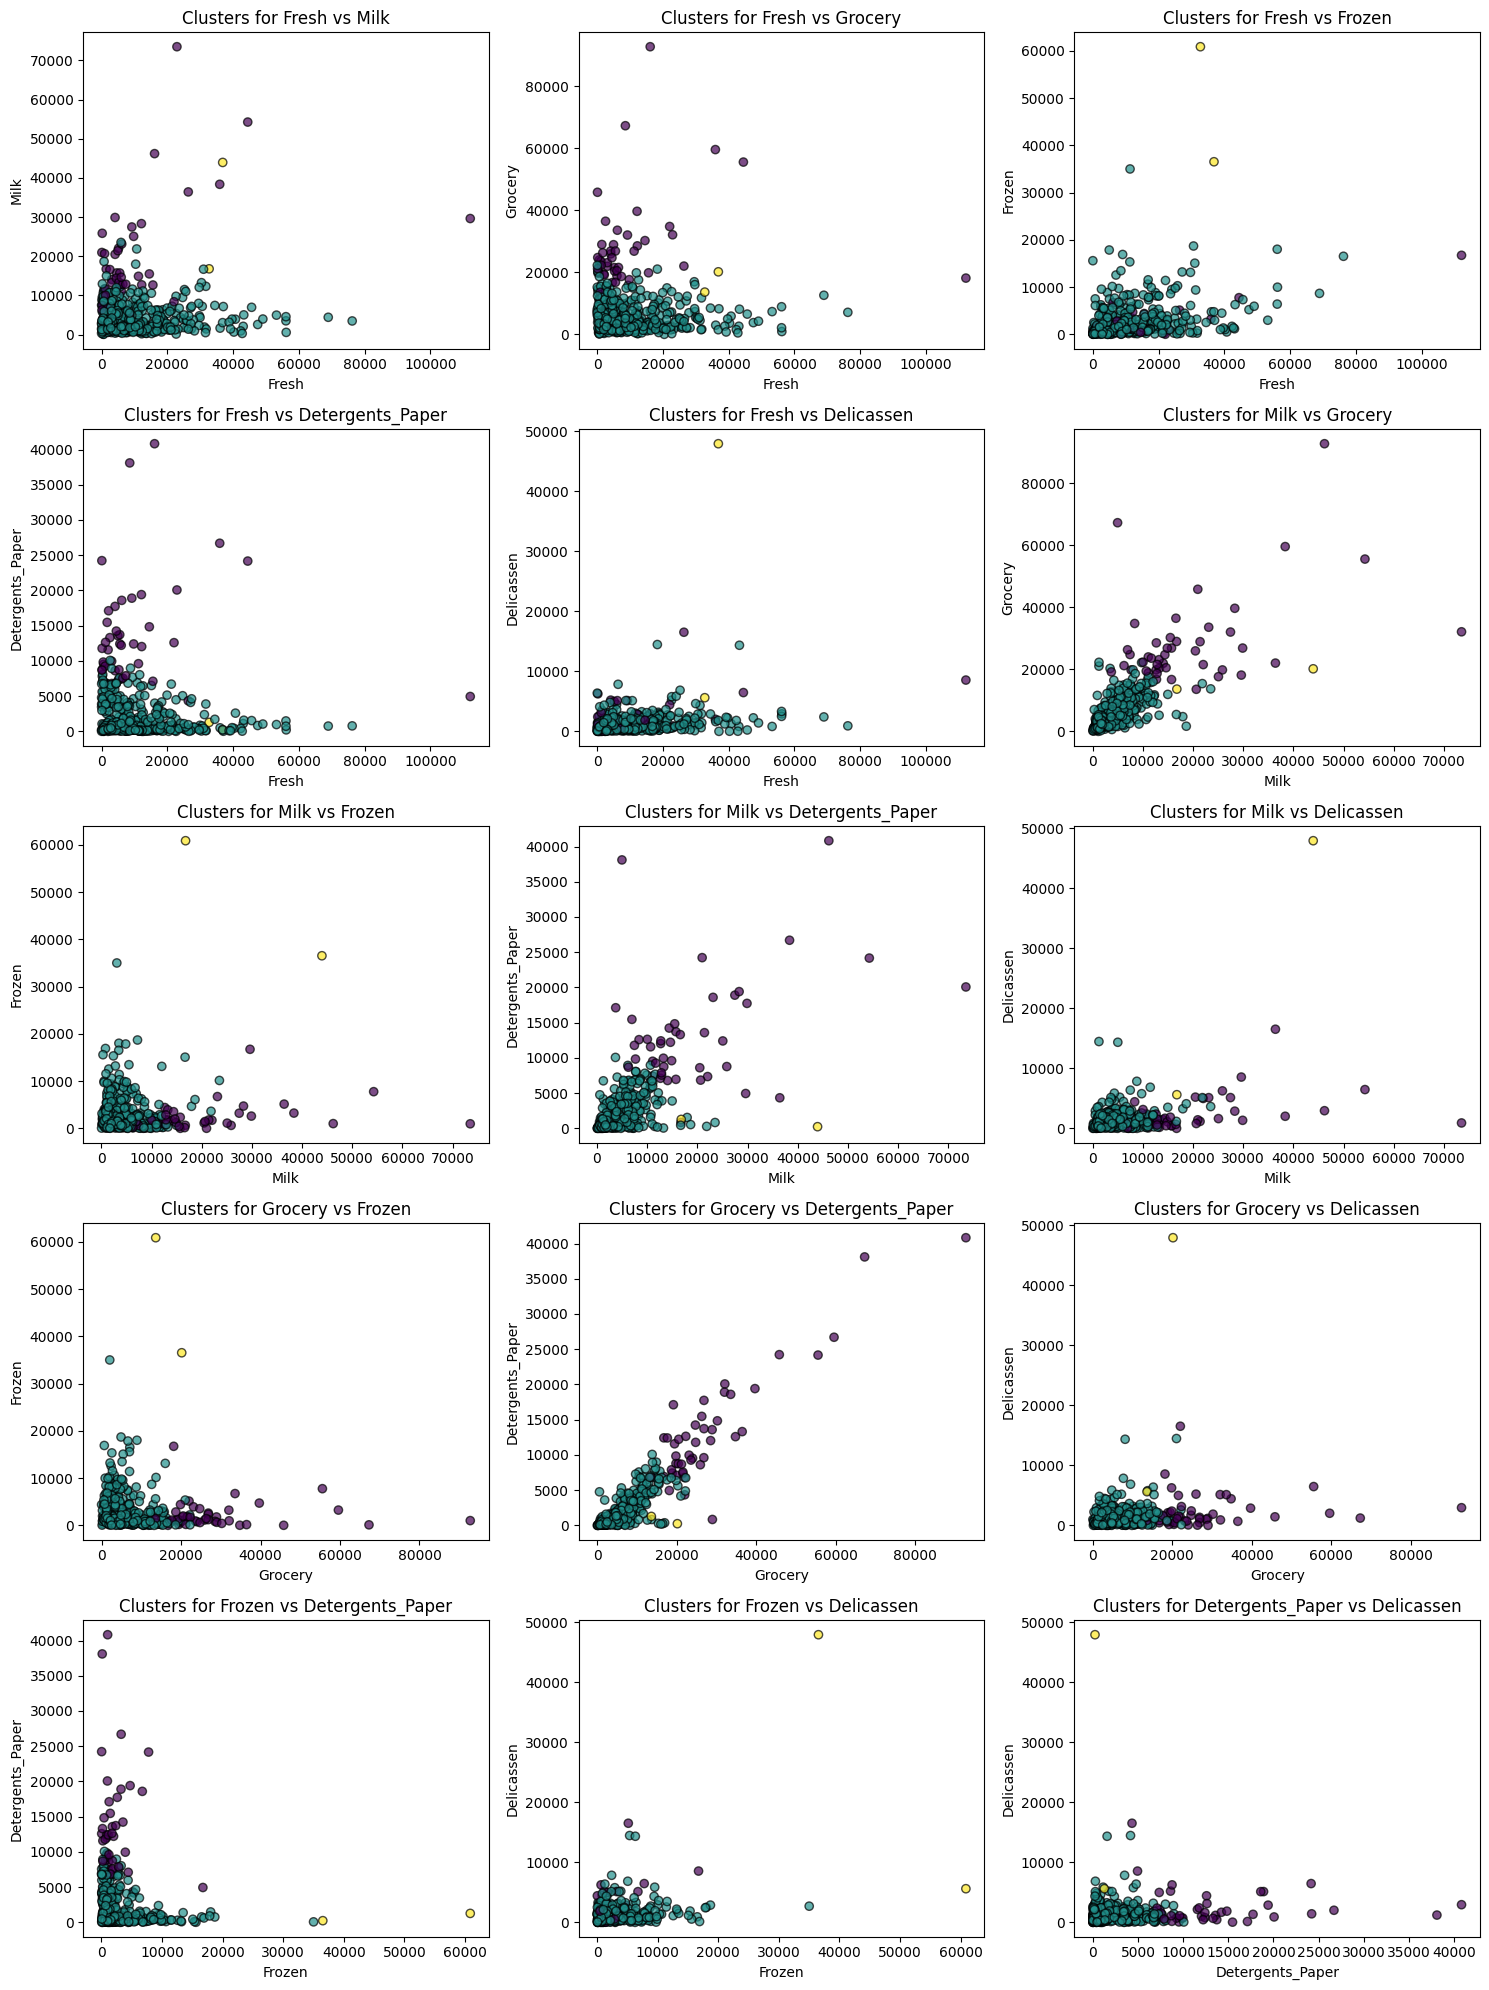

In [130]:
import matplotlib.pyplot as plt
from itertools import combinations

# Assuming 'df' is your DataFrame and 'k_labels' are the labels from KMeans with K=3
attributes = df.columns  # Replace with your actual dataframe columns
pairs = combinations(attributes, 2)  # Get all possible pairs of attributes

# Create scatter plots for each pair of attributes
plt.figure(figsize=(15, 20))  # Adjust the figure size as needed

# 15 plots, for 15 pairs (if you have 6 attributes)
for i, (attr1, attr2) in enumerate(pairs, 1):
    plt.subplot(5, 3, i)  # Adjust the layout numbers as needed
    plt.scatter(df[attr1], df[attr2], c=k_labels, cmap='viridis', edgecolor='k', alpha=0.7)
    plt.xlabel(attr1)
    plt.ylabel(attr2)
    plt.title(f'Clusters for {attr1} vs {attr2}')

plt.tight_layout()
plt.show()


In [134]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/coronavirus_tweets.csv', encoding='latin1')

# Compute the possible sentiments and their frequencies
sentiment_counts = df['Sentiment'].value_counts()

# Find the second most popular sentiment
second_most_popular_sentiment = sentiment_counts.index[1]

# Convert 'TweetAt' to datetime and find the date with the greatest number of 'Extremely Positive' tweets
df['TweetAt'] = pd.to_datetime(df['TweetAt'])
extremely_positive_dates = df[df['Sentiment'] == 'Extremely Positive']['TweetAt'].dt.date.value_counts()
date_most_extremely_positive = extremely_positive_dates.idxmax()

# Output results
print(f"Sentiment counts: \n{sentiment_counts}\n")
print(f"Second most popular sentiment: {second_most_popular_sentiment}\n")
print(f"Date with the most extremely positive tweets: {date_most_extremely_positive}\n")


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import string

# Make sure you have the necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Preprocess the tweets
# Convert to lowercase and remove non-alphabetical characters
df['ProcessedTweet'] = df['OriginalTweet'].str.lower()
df['ProcessedTweet'] = df['ProcessedTweet'].str.replace('[^a-z\s]', ' ', regex=True)

# Tokenize the tweets
df['Tokens'] = df['ProcessedTweet'].apply(word_tokenize)

# Count the total number of words including repetitions
total_word_count = sum(df['Tokens'].apply(len))

# Count the number of distinct words
distinct_word_count = len(set(word for tweet in df['Tokens'] for word in tweet))

# Remove stopwords and words with ≤ 2 characters, and stem the words
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

df['Tokens'] = df['Tokens'].apply(
    lambda tokens: [stemmer.stem(word) for word in tokens if word not in stop_words and len(word) > 2]
)

# Recompute the 10 most frequent words
all_words = [word for tokens in df['Tokens'] for word in tokens]
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(10)

# Output results
print(f"Total word count (with repetitions): {total_word_count}\n")
print(f"Distinct word count: {distinct_word_count}\n")
print(f"10 most frequent words: {most_common_words}\n")


C:\Users\eagua\AppData\Local\Temp\ipykernel_37140\45376369.py:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['TweetAt'] = pd.to_datetime(df['TweetAt'])
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eagua\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eagua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sentiment counts: 
Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

Second most popular sentiment: Negative

Date with the most extremely positive tweets: 2020-03-25

Total word count (with repetitions): 1351476

Distinct word count: 80067

10 most frequent words: [('http', 24014), ('covid', 23238), ('coronaviru', 18215), ('price', 9139), ('store', 8315), ('supermarket', 7821), ('food', 7351), ('groceri', 6787), ('peopl', 5652), ('consum', 5400)]



In [135]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
#df = pd.read_csv('data/coronavirus_tweets.csv', encoding='latin1')

# Let's assume 'ProcessedTweet' contains the preprocessed tweets
# If not, you would need to preprocess them as shown in the previous steps

# Step 1: Vectorize the tweets
vectorizer = CountVectorizer(max_features=1000)  # Start with 1000 features. Tune this parameter later.
X = vectorizer.fit_transform(df['ProcessedTweet'])

# Step 2: Fit a Multinomial Naive Bayes classifier
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split into training and test sets

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Step 3: Predict and calculate the training accuracy
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classifier training accuracy: {accuracy}")

# Step 4: Parameter tuning
# This can be done by trying different values for 'max_features' in CountVectorizer,
# or by using parameters like 'min_df' and 'max_df' to ignore terms that have a document
# frequency strictly lower/higher than the given threshold.
# Additionally, you can also use GridSearchCV or RandomizedSearchCV for hyperparameter tuning.

# Note: The above process might need to be repeated multiple times with different
# values for the parameters in CountVectorizer to find the ones that give
# the highest classification accuracy.

# Output the accuracy
print(f"Accuracy on test set: {accuracy}")


Classifier training accuracy: 0.4618561710398445
Accuracy on test set: 0.4618561710398445


In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Define a pipeline that includes both the vectorizer and the classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

# Define the parameter grid
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__min_df': (1, 2),
    'vect__max_features': (None, 5000, 10000, 50000),
    'clf__alpha': (1.0, 0.1, 0.01, 0.001)
}

# Initialize the grid search
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=5)

# Perform the grid search on the preprocessed tweet data
grid_search.fit(df['ProcessedTweet'], y)

# Output the best score and parameters
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best score: 0.482
Best parameters set:
	clf__alpha: 1.0
	vect__max_df: 0.5
	vect__max_features: 5000
	vect__min_df: 2
